In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import multiprocessing
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score, f1_score
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
cores = multiprocessing.cpu_count()
os.listdir()

['opencv-text-detection.zip',
 '.ipynb_checkpoints',
 'accepted_projects',
 'Andrew W. Trask - Grokking Deep Learning-Manning Publications (2019).pdf',
 'corpus',
 'corpus.zip',
 'doc2vec.ipynb',
 'google-play-store-apps',
 'google-play-store-apps.zip',
 'helpline-of-all-sorts',
 'helpline-of-all-sorts.zip',
 'kmeans_clustering.ipynb',
 'labels.txt',
 'logistic_regression.ipynb',
 'MURA-v1.1',
 'MURA-v1.1.zip',
 'nltk',
 'opencv-text-detection',
 'Papers',
 'Papers.zip',
 'Papers_Association_Rule',
 'processed_dataset.csv',
 'reviews.txt',
 'sentiment_analysis_from_story_preprocessing.ipynb',
 'sentiment_dictionary.csv',
 'sklearn_test.ipynb',
 'Slides',
 'Story-categorization-using-NLP',
 'Tan.pdf',
 'Testing',
 'Udacity',
 'videodata.csv',
 'word2vec.model',
 'word2vector_test.ipynb']

In [2]:
df = pd.read_csv(os.getcwd() + "/helpline-of-all-sorts/helpline_datasets.csv", header=None, usecols=[0,1], names=['story', 'category'])

In [3]:
df.head(10)

,story,category
0,"Just like any other day, employees arrived in ...",0
1,My so-called ‘friends’ in middle school used t...,1
2,i have been called hurtful names and i have be...,1
3,at my old school kids would hit me and call me...,1
4,I had debilitating migraines for three years b...,0
5,"I love my work, but hate going each day becaus...",0
6,I have a chronic illness which was doing well ...,0
7,The other part is that sense of worthlessness....,0
8,I feel my whole body hurting. My mental health...,0
9,"As a librarian, I've been threatened with stal...",2


In [4]:
df['story']

0     Just like any other day, employees arrived in ...
1     My so-called ‘friends’ in middle school used t...
2     i have been called hurtful names and i have be...
3     at my old school kids would hit me and call me...
4     I had debilitating migraines for three years b...
5     I love my work, but hate going each day becaus...
6     I have a chronic illness which was doing well ...
7     The other part is that sense of worthlessness....
8     I feel my whole body hurting. My mental health...
9     As a librarian, I've been threatened with stal...
10    I worked as an office manager, and the only wo...
11    I used to work for a call center and the men t...
12    When I was 13 or 14, I was babysitting two kid...
13    I work in law enforcement. I started out as a ...
14    I’m a waitress, and I get harassed daily by cu...
15    I got made fun of for being fat in elementary,...
16    My whole life I’ve had a speech impediment whe...
17    I was fresh off of moving to a new town an

In [5]:
df['category']

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     2
10    2
11    2
12    2
13    2
14    2
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
Name: category, dtype: int64

In [6]:
df.shape

(29, 2)

In [7]:
df.index = range(29)

In [8]:
df.story.apply(lambda x: len(x.split(' '))).sum()

3021

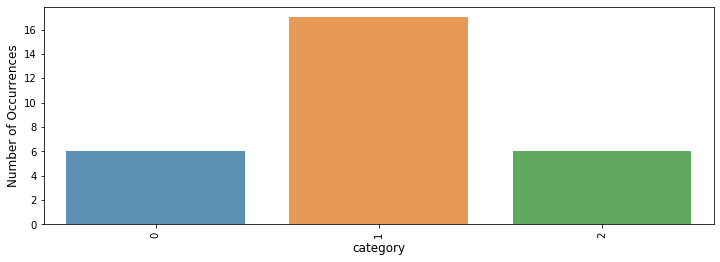

In [9]:
cnt_pro = df['category'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [10]:
print(df.story[2])
print(df.category[2])

i have been called hurtful names and i have been called black bitch and people are making fun of me for being black by my suppost to be friend t and she has posted rumors about me and i dont know what to do.
1


In [11]:
print(df.story[0])
print(df.category[0])

Just like any other day, employees arrived in the workplace sparingly, filling the cubicles and getting their coffees ready. Once more, the manager was already sitting at his desk, grumbling and shouting - You’re way too slow, again! How am I supposed to get my work done with you slowing me down every day? The other employees were staring at each other. They were embarrassed by his outburst but deep inside they knew he was right. Satisfied by the nods in the assembly, the manager calmed down. As usual, he quickly got absorbed by his screen and numerous emails. He was not the moody type, just a normal guy. His team liked him very much and his performance record was exemplary. He was often described as someone caring and trustworthy with a genuine interest in people. Yet once again, his fist hit the desk loudly as he started screaming. That’s it, I’m done! Slow and unreliable old crap! You made me lose five hours of my life, again. World will be better off without you and I’m going to le

In [12]:
print(df.story[10])
print(df.category[10])

I worked as an office manager, and the only woman, for an industrial insulation company. I had just come back from maternity leave and I was worried about my milk supply. I went into the bathroom to pump for about 15 minutes every two hours, and all of the men in the office would stand in the break area (right in front of the bathroom door) and make baby crying noises to make fun of me. Eventually it progressed to the point that they would make crying noises every time they passed my desk in hopes that I would leak through my shirt. They would also make comments about how much larger my breasts were since having a baby. I felt so harassed and unsafe that I would dread going to work every day, and I even had more than a few nervous breakdowns. My husband was furious and I had to convince him not to take any drastic action so that I could be sure to have a good reference if I needed to find another job. We had a long conversation and looked at our finances and decided the extra money was

In [13]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['story'] = df['story'].apply(cleanText)

In [14]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [15]:
train, test = train_test_split(df, test_size = .20, random_state = 2)

In [16]:
train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)

In [17]:
train

,story,category
16,my whole life i’ve had a speech impediment whe...,1
6,i have a chronic illness which was doing well ...,0
3,at my old school kids would hit me and call me...,1
19,i’ve always been super flat-chested and i’m st...,1
27,today at recess a group of senior guys came up...,1
26,i was in my class 8 year in a different school...,1
12,"when i was 13 or 14, i was babysitting two kid...",2
4,i had debilitating migraines for three years b...,0
10,"i worked as an office manager, and the only wo...",2
5,"i love my work, but hate going each day becaus...",0


In [18]:
len(train)

23

In [19]:
test

,story,category
1,my so-called ‘friends’ in middle school used t...,1
0,"just like any other day, employees arrived in ...",0
14,"i’m a waitress, and i get harassed daily by cu...",2
9,"as a librarian, i've been threatened with stal...",2
20,yesterday during lunchbreak thoe girls called ...,1
24,high school and junior high were hell for me. ...,1


In [20]:
len(test)

6

In [21]:
train_tagged

16    ([my, whole, life, ve, had, speech, impediment...
6     ([have, chronic, illness, which, was, doing, w...
3     ([at, my, old, school, kids, would, hit, me, a...
19    ([ve, always, been, super, flat-chested, and, ...
27    ([today, at, recess, group, of, senior, guys, ...
26    ([was, in, my, class, year, in, different, sch...
12    ([when, was, 13, or, 14, was, babysitting, two...
4     ([had, debilitating, migraines, for, three, ye...
10    ([worked, as, an, office, manager, and, the, o...
5     ([love, my, work, but, hate, going, each, day,...
21    ([ever, since, first, grade, my, three, best, ...
17    ([was, fresh, off, of, moving, to, new, town, ...
2     ([have, been, called, hurtful, names, and, hav...
7     ([the, other, part, is, that, sense, of, worth...
25    ([my, bullying, started, or, when, first, noti...
23    ([was, born, with, craniofacial, disease, call...
18    ([one, time, my, freshman, year, of, high, sch...
11    ([used, to, work, for, call, center, and, 

In [22]:
train_tagged.values[2]

TaggedDocument(words=['at', 'my', 'old', 'school', 'kids', 'would', 'hit', 'me', 'and', 'call', 'me', 'names', 'one', 'time', 'one', 'of', 'them', 'ran', 'into', 'me', 'and', 'hit', 'my', 'head', 'on', 'the', 'floor', 'and', 'after', 'felt', 'like', 'someone', 'was', 'stabbing', 'my', 'head', 'all', 'weekend', 'at', 'first', 'didn', 'tell', 'my', 'mom', 'but', 'it', 'ended', 'up', 'getting', 'so', 'bad', 'that', 'had', 'to', 'transfer', 'now', 'do', "n't", 'know', 'how', 'will', 'cope', 'in', 'new', 'environment', 'with', 'new', 'people', 'fear', 'would', 'end', 'up', 'in', 'similar', 'situation'], tags=[1])

In [23]:
test_tagged.values[1]

TaggedDocument(words=['just', 'like', 'any', 'other', 'day', 'employees', 'arrived', 'in', 'the', 'workplace', 'sparingly', 'filling', 'the', 'cubicles', 'and', 'getting', 'their', 'coffees', 'ready', 'once', 'more', 'the', 'manager', 'was', 'already', 'sitting', 'at', 'his', 'desk', 'grumbling', 'and', 'shouting', 'you', 're', 'way', 'too', 'slow', 'again', 'how', 'am', 'supposed', 'to', 'get', 'my', 'work', 'done', 'with', 'you', 'slowing', 'me', 'down', 'every', 'day', 'the', 'other', 'employees', 'were', 'staring', 'at', 'each', 'other', 'they', 'were', 'embarrassed', 'by', 'his', 'outburst', 'but', 'deep', 'inside', 'they', 'knew', 'he', 'was', 'right', 'satisfied', 'by', 'the', 'nods', 'in', 'the', 'assembly', 'the', 'manager', 'calmed', 'down', 'as', 'usual', 'he', 'quickly', 'got', 'absorbed', 'by', 'his', 'screen', 'and', 'numerous', 'emails', 'he', 'was', 'not', 'the', 'moody', 'type', 'just', 'normal', 'guy', 'his', 'team', 'liked', 'him', 'very', 'much', 'and', 'his', 'perf

### PV-DBOW

In [24]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 23/23 [00:00<00:00, 104971.70it/s]


In [25]:
%%time
for epoch in range(5):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 23/23 [00:00<00:00, 231340.51it/s]

CPU times: user 31.4 ms, sys: 583 µs, total: 32 ms
Wall time: 25.9 ms


In [26]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [27]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [28]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/home/arfan/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arfan/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.16666666666666666
Testing F1 score: 0.20000000000000004


### PV-DM

In [30]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 23/23 [00:00<00:00, 108149.09it/s]


In [31]:
%%time
for epoch in range(5):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 23/23 [00:00<00:00, 98137.33it/s]

CPU times: user 44.1 ms, sys: 465 µs, total: 44.5 ms
Wall time: 43.8 ms


In [32]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

In [33]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/home/arfan/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arfan/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.16666666666666666
Testing F1 score: 0.20000000000000004


/home/arfan/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Paired Model

In [35]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [36]:
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [37]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [38]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

In [39]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/home/arfan/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arfan/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [40]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.16666666666666666
Testing F1 score: 0.20000000000000004


/home/arfan/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
